### **Project Overview**

The fundamental goal of this project is to construct and train a neural network that can accurately identify handwritten digits. To achieve this, the well-known MNIST dataset, which comprises a large collection of such digits, is utilized. The process can be broken down into four primary stages: preparing the data, defining the network's architecture, training the model, and finally, evaluating its performance.

### **1. Data Preparation and Loading**

*   **The MNIST Dataset:** The project uses the MNIST dataset, a classic benchmark in the machine learning community. It contains 70,000 grayscale images of handwritten digits from 0 to 9. These are divided into a training set of 60,000 images and a test set of 10,000 images.

*   **Transformations:** Before the images are fed into the neural network, they undergo two key transformations:
    *   **ToTensor:** This initial step converts the images, which are originally in a format easily readable by imaging libraries, into tensors, the fundamental data structure used by PyTorch for all its computations.
    *   **Normalization:** Each image is then normalized. This is a standard procedure where the pixel values are adjusted to have a specific mean and standard deviation. This helps the model train more efficiently and effectively by ensuring that the data is on a consistent scale.

*   **Data Loaders:** To manage the data flow into the model, `DataLoader` is employed for both the training and testing datasets. Its responsibilities include:
    *   **Batching:** Instead of processing one image at a time, the DataLoader groups the images and their corresponding labels into smaller batches. This approach is more computationally efficient and aids in the model's ability to learn general patterns.
    *   **Shuffling:** For the training data, the DataLoader shuffles the images at the beginning of each training cycle (or epoch). This randomization is crucial to prevent the model from learning the order of the data, which could otherwise lead to a less generalized understanding.

### **2. The Convolutional Neural Network (CNN) Architecture**

A Convolutional Neural Network (CNN) is a specialized type of neural network particularly well-suited for image processing tasks. The architecture designed in this project consists of several layers, each performing a specific function:

*   **First Convolutional Layer:** This layer applies a set of 32 filters (or kernels) to the input image. These filters are small matrices of weights that slide across the image, detecting basic features like edges, corners, and gradients.

*   **ReLU Activation:** Following the convolution, a Rectified Linear Unit (ReLU) activation function is applied. Its purpose is to introduce non-linearity into the model, allowing it to learn more complex patterns. It does this by changing all negative pixel values to zero and leaving positive values unchanged.

*   **First Max Pooling Layer:** This layer downsamples the feature map, reducing its spatial dimensions. It works by taking the maximum value from a small window of pixels, which helps to make the detected features more robust to slight variations in their position.

*   **Second Convolutional and Max Pooling Layers:** This sequence is repeated with a second convolutional layer that uses 64 filters to detect more intricate features from the output of the previous layers. This is again followed by a ReLU activation and another max pooling layer.

*   **Flattening:** After the convolutional and pooling stages, the resulting multi-dimensional feature map is flattened into a one-dimensional vector. This prepares the data for the final classification stage.

*   **First Fully Connected (Linear) Layer:** This layer takes the flattened vector and transforms it into a 128-node representation, followed by another ReLU activation.

*   **Dropout Layer:** A dropout layer is included to prevent overfitting. During training, it randomly sets a fraction of the neuron activations to zero. This forces the network to learn more robust features and not become overly reliant on any single neuron.

*   **Second Fully Connected (Output) Layer:** This is the final layer of the network. It takes the 128-node vector from the previous layer and produces an output of 10 values. Each of these values represents the model's confidence that the input image corresponds to one of the 10 digits (0 through 9).

### **3. The Training Process**

The training phase is where the model learns to correctly classify the handwritten digits. This is an iterative process that involves the following components:

*   **Model Instantiation:** An instance of the defined CNN architecture is created with an output dimension of 10, corresponding to the 10 possible digits. The model is then set to "train" mode.

*   **Optimizer:** The Adam optimizer is chosen for this task. The optimizer's role is to update the model's parameters (the weights and biases in each layer) in a way that minimizes the error.

*   **Loss Function:** The Cross-Entropy Loss function is used. This function measures the difference between the model's predicted probabilities for each digit and the actual, true label. A higher loss value indicates a larger discrepancy and, therefore, a greater error.

*   **Training Loop:** The model is trained for a set number of epochs (in this case, 2). An epoch represents one complete pass through the entire training dataset. Within each epoch, the following steps are repeated for each batch of data:
    1.  **Forward Pass:** The batch of images is passed through the network, and the model produces its predictions.
    2.  **Loss Calculation:** The loss function compares these predictions to the true labels, calculating the error.
    3.  **Backpropagation:** The calculated loss is then propagated backward through the network. This process determines how much each parameter contributed to the overall error.
    4.  **Parameter Update:** The optimizer uses the information from backpropagation to adjust the model's parameters, aiming to reduce the loss in the next iteration.

### **4. Evaluation**

After the training is complete, the model's performance is evaluated on the separate test dataset, which it has not seen before. This provides an unbiased measure of how well the model has generalized its learning.

*   **Evaluation Mode:** The model is switched to "evaluation" mode. This is important as it deactivates layers like dropout, which are only used during training.

*   **Inference:** The model processes each image in the test set and makes a prediction. The prediction is determined by selecting the digit corresponding to the highest output value from the final layer.

*   **Accuracy Calculation:** The model's predictions are compared to the true labels of the test data. The accuracy is then calculated as the percentage of images that were correctly classified. The final output shows a high accuracy, indicating that the model has successfully learned to recognize handwritten digits.

In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root = "./data", train = True, download = False, transform = transform) 
test_dataset = datasets.MNIST(root = "./data", train = False, download = False, transform = transform)


train_loader = DataLoader(dataset = train_dataset, batch_size = 1024, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = 64, shuffle = False)


In [4]:
image,label = next(iter(train_loader))
image.shape
    

torch.Size([1024, 1, 28, 28])

In [5]:
label

tensor([5, 4, 0,  ..., 2, 5, 8])

In [22]:
#image[1]

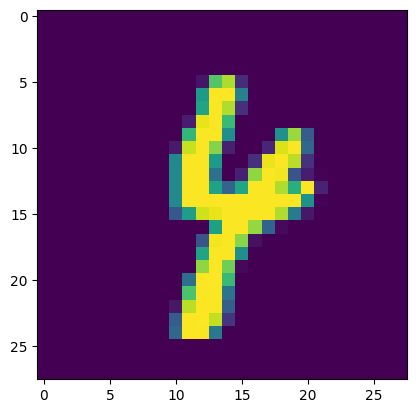

In [7]:
import matplotlib.pyplot as plt
plt.imshow(image[1].permute(1,2,0))

In [8]:
import torch
import torch.nn as nn 
import torch.nn.functional as F


class CNN_MNIST(nn.Module):
    def __init__(self, output_dim):
        super(CNN_MNIST, self).__init__()
       
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1)
       
        self.fc1 = nn.Linear(7*7*64, 128)
        self.fc2 = nn.Linear(128, output_dim)
        
        self.dropout = nn.Dropout(0.25)

    def forward(self,x):
     # print (x.shape)
    
     x = self.conv1(x)
     x = F.relu(x)
     # print (x.shape)
     x = F.max_pool2d(x,2)

     x = self.conv2(x)
     x = F.relu(x)
     # print (x.shape)
     x = F.max_pool2d(x,2)

     x = x.view(x.size(0), -1)
     x = self.fc1(x)
     x = F.relu(x)
     # print (x.shape)
    
     x = self.dropout(x)
     x= self.fc2(x)
    
     return x 


In [9]:
torch.manual_seed(42)
model = CNN_MNIST(output_dim = 10)

In [10]:
image,label = next(iter(train_loader))
image.size(0)

1024

In [11]:
label

tensor([6, 7, 7,  ..., 4, 2, 1])

In [12]:
model(image)

tensor([[-0.1020, -0.0331, -0.1971,  ..., -0.0370,  0.1172, -0.2143],
        [ 0.0285, -0.1087, -0.1690,  ..., -0.0304,  0.1927, -0.2144],
        [-0.0303,  0.0490, -0.0208,  ..., -0.0829,  0.1369, -0.0929],
        ...,
        [-0.0254, -0.0227, -0.1173,  ..., -0.0332,  0.0614, -0.1748],
        [-0.0160, -0.0602, -0.2174,  ...,  0.0288,  0.0634, -0.1640],
        [ 0.0247, -0.0346, -0.0118,  ..., -0.0227,  0.0726, -0.1564]],
       grad_fn=<AddmmBackward0>)

In [18]:
model = CNN_MNIST(output_dim = 10)
model.train()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

lossi = []
stepi = []
counter = 0

for epoch in range(2):
    for image, label in train_loader:
        output = model(image)
        loss = criterion(output, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())
        stepi.append(counter)
        counter += 1

        if counter % 10 == 0:
            print(f"Epoch [{epoch+1}/2], Loss: {loss.item():.4f}")


Epoch [1/2], Loss: 0.8305
Epoch [1/2], Loss: 0.4255
Epoch [1/2], Loss: 0.3053
Epoch [1/2], Loss: 0.2586
Epoch [1/2], Loss: 0.2583
Epoch [2/2], Loss: 0.1436
Epoch [2/2], Loss: 0.1501
Epoch [2/2], Loss: 0.1077
Epoch [2/2], Loss: 0.1177
Epoch [2/2], Loss: 0.0952
Epoch [2/2], Loss: 0.1068


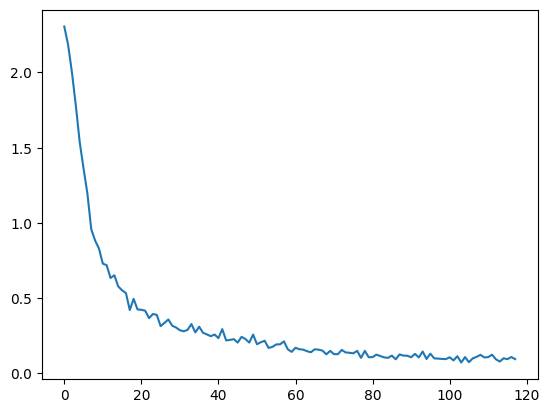

In [19]:
import matplotlib.pyplot as plt
plt.plot(stepi, lossi)

In [21]:
model.eval()

correct = 0 
total = 0 

with torch.no_grad():
     for image, label in test_loader:
         output = model(image)
         _,predicted = torch.max(output, 1)
         total += label.size(0)
         correct += (predicted == label).sum().item()
         
accuracy = 100 * correct / total
print (f" test accuracy: {accuracy:2f}%")

 test accuracy: 98.160000%
